## Skimage demos

Some examples of how to use `skimage` along with image transformations


In [84]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io

In [86]:
# default values
FIG_SIZE = (4, 4)


def show(
    image: np.ndarray,
    title: str,
    cmap="gray",
) -> None:
    plt.figure(figsize=FIG_SIZE)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


def compare(
    images: list[tuple[np.ndarray, str]],
    cmap="gray",
) -> None:
    figsize = (FIG_SIZE[0] * len(images), FIG_SIZE[1])
    _, ax = plt.subplots(1, len(images), figsize=figsize)

    for i, (img, title) in enumerate(images):
        ax[i].imshow(img, cmap=cmap)
        ax[i].set_title(title)
        ax[i].axis("off")

    plt.tight_layout()
    plt.show()

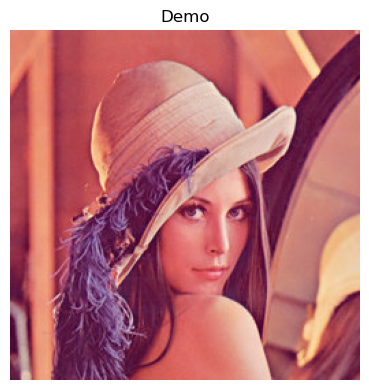

In [87]:
img = io.imread("./Lena_RGB.png")

show(img, "Demo")

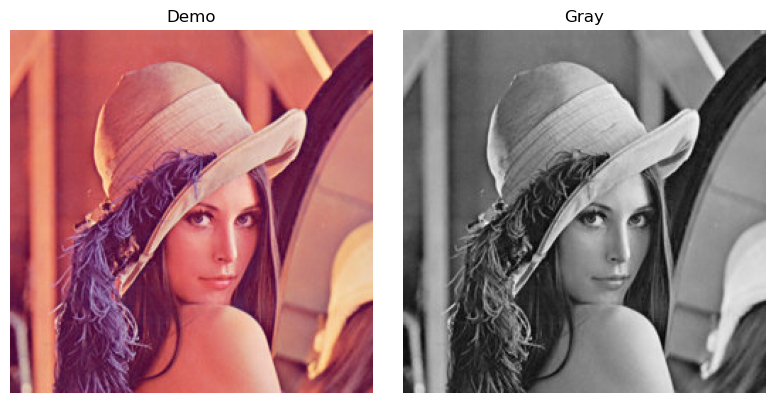

In [88]:
img_gray = io.imread("./Lena_RGB.png", as_gray=True)

compare(
    [
        [img, "Demo"],
        [img_gray, "Gray"],
    ]
)

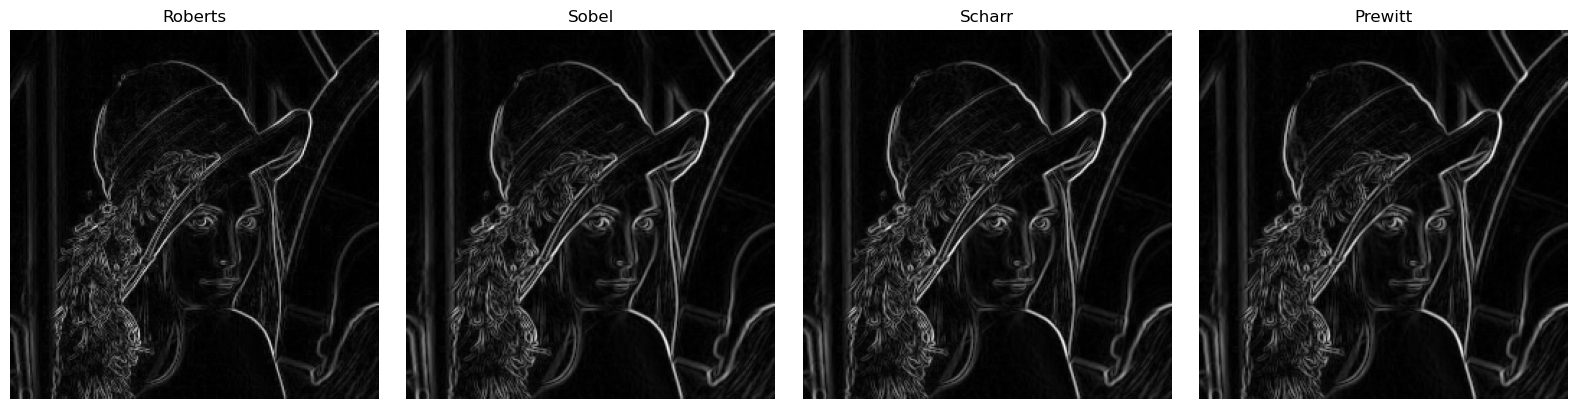

In [94]:
from skimage.filters import roberts, sobel, scharr, prewitt


compare(
    [
        [roberts(img_gray), "Roberts"],
        [sobel(img_gray), "Sobel"],
        [scharr(img_gray), "Scharr"],
        [prewitt(img_gray), "Prewitt"],
    ]
)

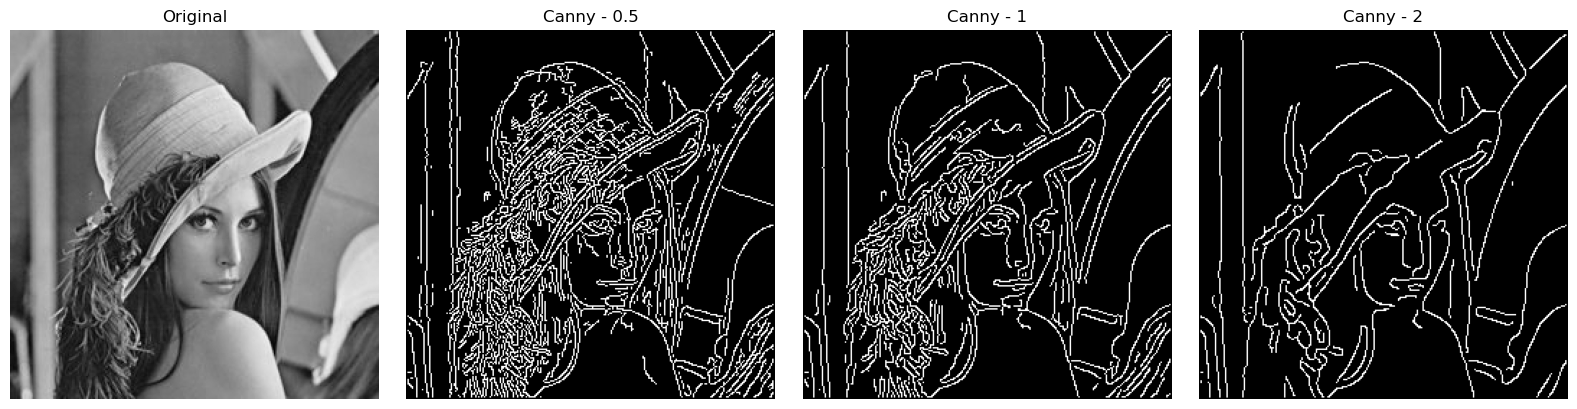

In [90]:
from skimage.feature import canny


compare(
    [
        [img_gray, "Original"],
        [canny(img_gray, sigma=0.5), "Canny - 0.5"],
        [canny(img_gray, sigma=1), "Canny - 1"],
        [canny(img_gray, sigma=2), "Canny - 2"],
    ],
)

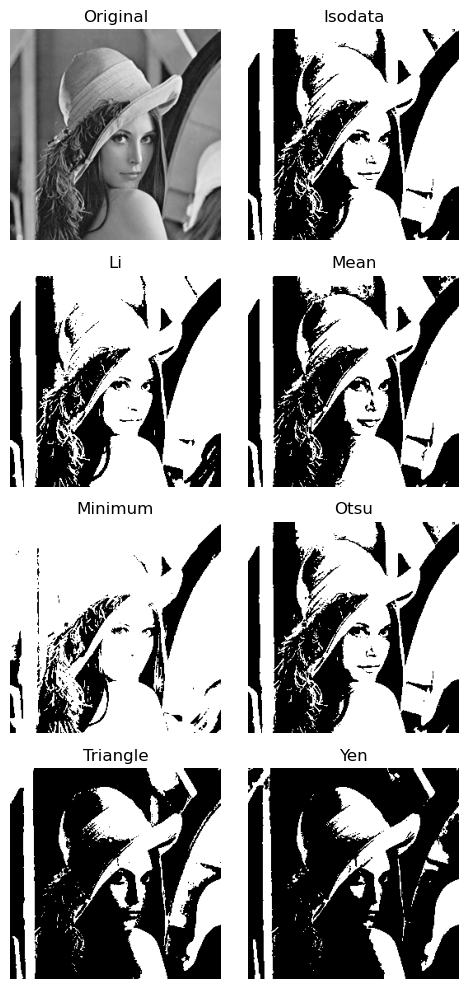

In [91]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(img_gray, figsize=(5, 10), verbose=False)
plt.show()

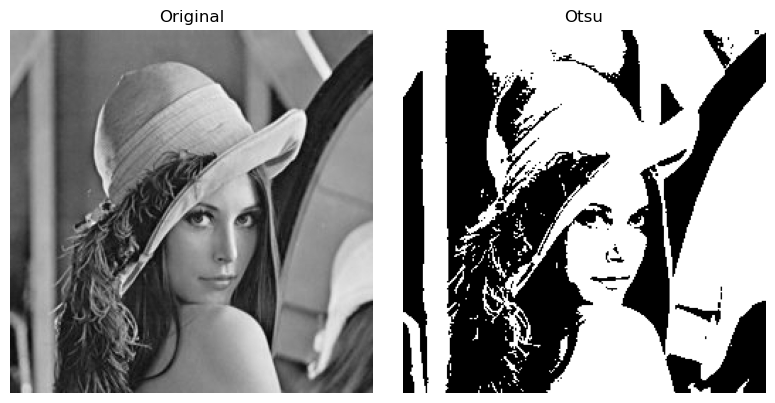

In [92]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img_gray)
binary = img_gray >= thresh

compare([[img_gray, "Original"], [binary, "Otsu"]])